<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C6/Clase6_1_Estadisticos_descriptivos_y_correlaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
options(repr.plot.width=8, repr.plot.height=6)

# Parte 4: Análisis descriptivo con R

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com


Una de las fases principales dentro de un proyecto de Data Science, corresponde al análisis exploratorio de datos. Es en esta etapa donde se realizan los primeros hallazgos, se verifica la calidad de los datos, se detectan anomalías, se identifican patrones y se realizan preguntas claves que permitan comenzar a realizar inferencias , o si es el caso, comenzar a plantear modelos con fines predictivos.

## I. Estadísticos descriptivos
### a) Medidas de posición
Corresponden a valores que nos permiten dividir nuestra muestra en conjuntos con aproximadamente la misma cantidad de individuos.
### b) Medidas de tendencia central
Corresponden a medidas a las que tienden “agruparse” los datos de la muestra .
### c) Medidas de dispersión
Medidas que cuantifican el nivel de heterogeneidad de una variable numérica.


En R contamos con funciones para lo anterior:

 - summary(): Por defecto entrega estadísticos de posición (cuartiles), min, max y media.
 - quantiles(): Retorna uno o varios percentiles de interés.
 - mean(): Calcula la media de un vector numérico.
 - median(): Calcula la mediana de un vector numérico.
 - sd(): Retorna la desviación estándar muestral.
 - var(): Retorna la varianza muestral.

### I.1. Descripción de data _mpg_

Analicemos el rendimiento en ciudad en función de los estadísticos descriptivos más conocidos.


In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data(mpg)
head(mpg)
# cyl: cilindros
# displ: Engine displacement, in lt "cilindrada"
# drv: traccion
# cty: city miles miles per gallonb
# hwy: highway miles per gallon
# fl: fuel type
# class: "type" of car

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Media, Mediana  y percentiles
Los percentiles, en particular la mediana corresponden a estadísticos de posición, ya que nos permiten "ubicarnos" dentro de la muestra que estamos analizando y nos dan una primera idea sobre la distribución de los datos a analizar. Por su parte la media (aritmética) corresponde a un estadístico de tendencia central.

In [4]:
# describamos el rendimiento en carretera en función de los estadísticos de pos., tendencia central  y dispersión

# promedio
print(paste("El promedio es: ", mean(mpg$hwy)))
# mediana
print(paste("La mediana es: ", median(mpg$hwy))) # el 50% de los vehículos analizados tiene un rendimiento menor o igual a 24mpg
# percentiles
quantile(median(mpg$hwy), 0.5)
# Más de un percentil a la vez
quantile(mpg$hwy, c(0.25,0.5,0.75)) # Son los cuartiles


[1] "El promedio es:  23.4401709401709"
[1] "La mediana es:  24"


50% 
 24

25% 50% 75% 
 18  24  27

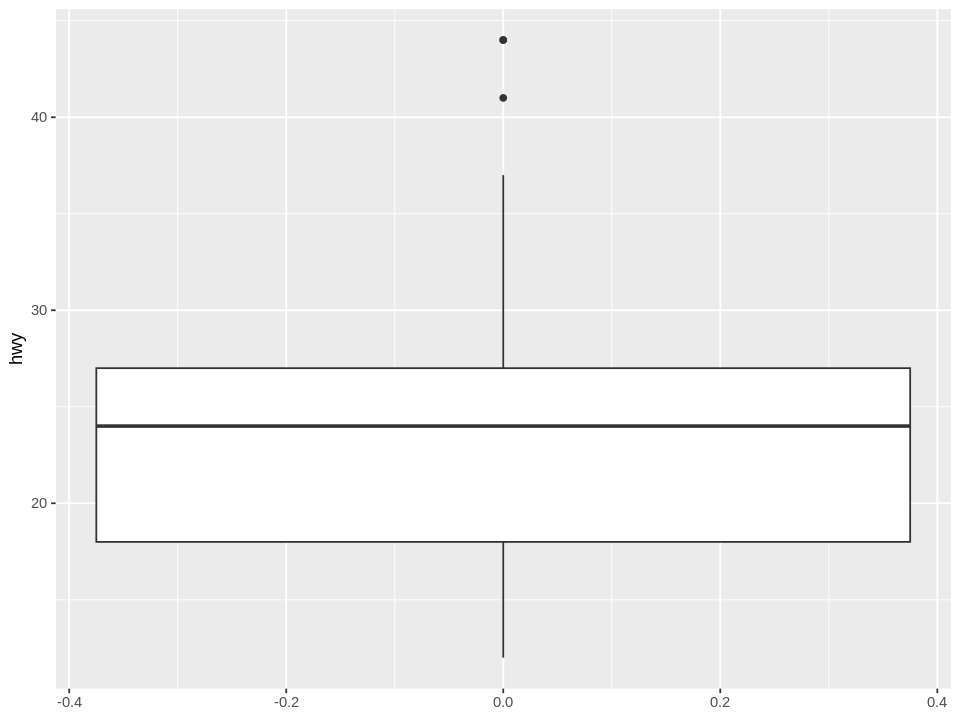

In [5]:
# recordar que podemos visualizar los cuartiles en un boxplot
mpg %>%
  ggplot() +
  aes(y = hwy) +
  geom_boxplot()


### Medidas de dispersión
Rango, desviación estándar  y rango intercuartílico. Son medidas que buscan cuantificar el nivel de dispersión o heterogeneidad de nuestra muestra.

In [6]:
# medidas de dispersión ---------------

# Rango
max(mpg$hwy) - min(mpg$hwy)

# Cómo saber cuál es el auto que tiene el menor rendimiento en carretera
# Desviación estándar
sd(mpg$hwy) # Podemos decir "que en promedio los rendimientos 'distan' de la media en 6 millas por galon".




[1] 32

[1] 5.954643

In [7]:
# Esa desviación estandar es alta o baja?
# podemos relativizar dicha medida a la media

In [8]:
# Coef de variación = desviación estandar / |promedio|
  sd(mpg$hwy)/abs(mean(mpg$hwy))

[1] 0.2540358

In [9]:
# Muestra A: sd = 300000, mean = 50000000
# Muestra B: sd = 300000, mean = 700000

(cv_A = 300000/50000000)
(cv_B = 300000/700000)

[1] 0.006

[1] 0.4285714

In [10]:
# Rango Inter-cuartílico
# Corresponde a la diferencia entre el percentil 75 y el percetil 25. Reppresenta el "anchho de la caja" en un boxplot.

quantile(mpg$hwy,0.75) - quantile(mpg$hwy,0.25)
IQR(mpg$hwy)
# Corresponde al rango del 50% central de la muestra.

75% 
  9

[1] 9

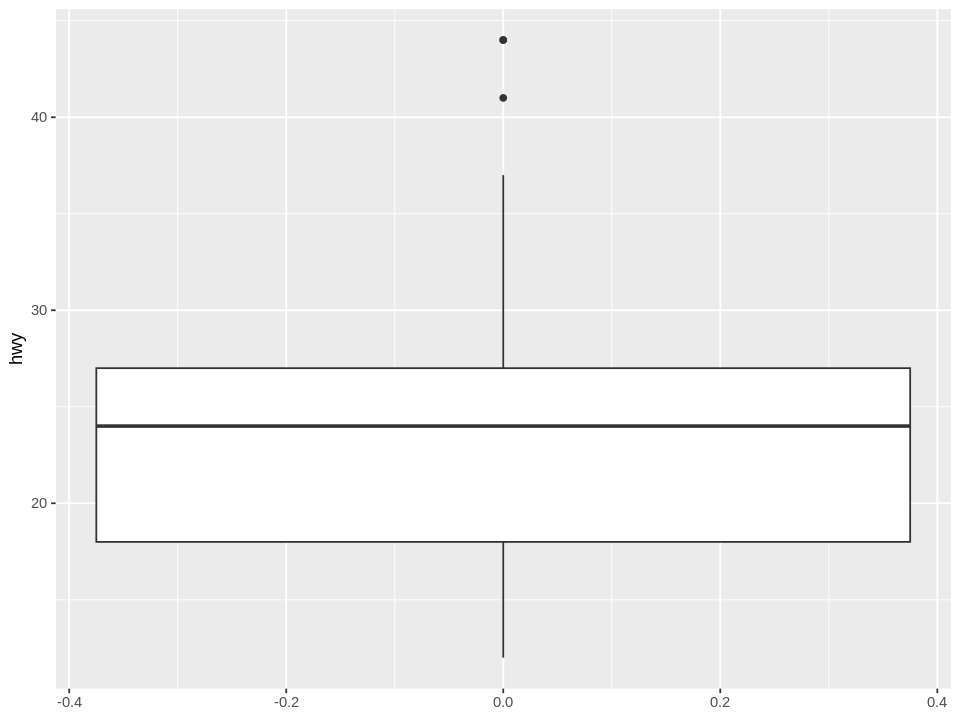

In [11]:
# Una obs se considera "extrema" si si valor está por sobre (debajo) 1.5 veces el rango intercuartílico (RI = Q3- Q1)
# IQR(mpg$hwy)
mpg %>%
  ggplot() +
  aes(y = hwy) +
  geom_boxplot()

In [12]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [13]:
# lim sup 1.5*IQR (por "arriba")
mpg %>%
  mutate(umbral_iqr_alto = quantile(hwy,0.75) + 1.5*IQR(hwy)) %>%
  filter(hwy > umbral_iqr_alto)



manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,umbral_iqr_alto
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,40.5
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,40.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,40.5


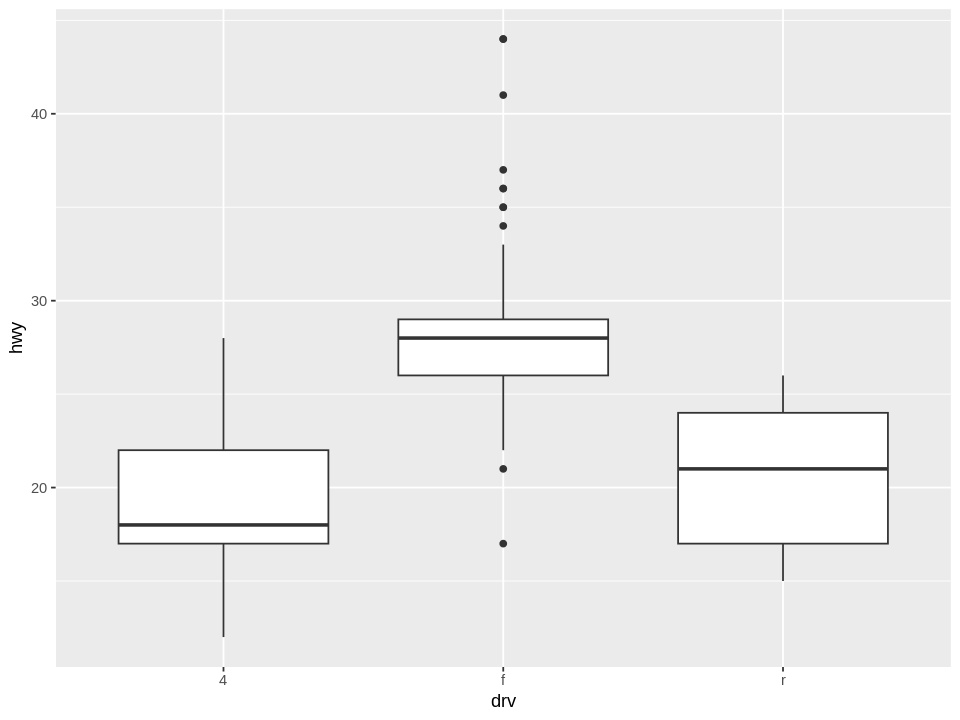

In [14]:
mpg %>%
  ggplot() +
  aes(x = drv, y = hwy) +
  geom_boxplot()

In [15]:
# Si consideramos solo los autos de tracción frontal, vemos que existen outliers por arriba y abajo
# lim inf 1.5*IQR (por "arriba")
mpg %>%
  filter(drv == "f") %>%
  mutate(umbral_iqr_alto = quantile(hwy,0.75) + 1.5*IQR(hwy)) %>%
  filter(hwy > umbral_iqr_alto)



manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,umbral_iqr_alto
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,33.5
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,33.5
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,33.5
toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,33.5
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,33.5
toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,33.5
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,33.5
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,33.5
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,33.5


In [16]:
# lim inf 1.5*IQR (por "debajo")
mpg %>%
  filter(drv == "f") %>%
  mutate(umbral_iqr_bajo = quantile(hwy,0.25) - 1.5*IQR(hwy)) %>%
  filter(hwy < umbral_iqr_bajo)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,umbral_iqr_bajo
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan,21.5
dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan,21.5


## II. Correlación de variables

Las medidas de correlación buscan cuantificar el nivel de asociación que existe entre dos variables. Uno de los coeficientes más populares para medir la dependencia lineal entre dos variables corresponde al coeficiente de corelación de Pearson.

Matemáticamente, el coeficiente de correlación de Pearson entre dos variables aleatorias X e Y se define como

$$\rho = \dfrac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]}{\sqrt{\sigma^2_X\sigma^2_Y}}$$

Este coeficiente varía entre -1 y 1, y alcanza dichos valores siempre que X e Y formen una recta.

Exploremos algunos ejemplos






**¿Cómo es la relación entre el rendimiento en carretera y el tamaño del motor?**

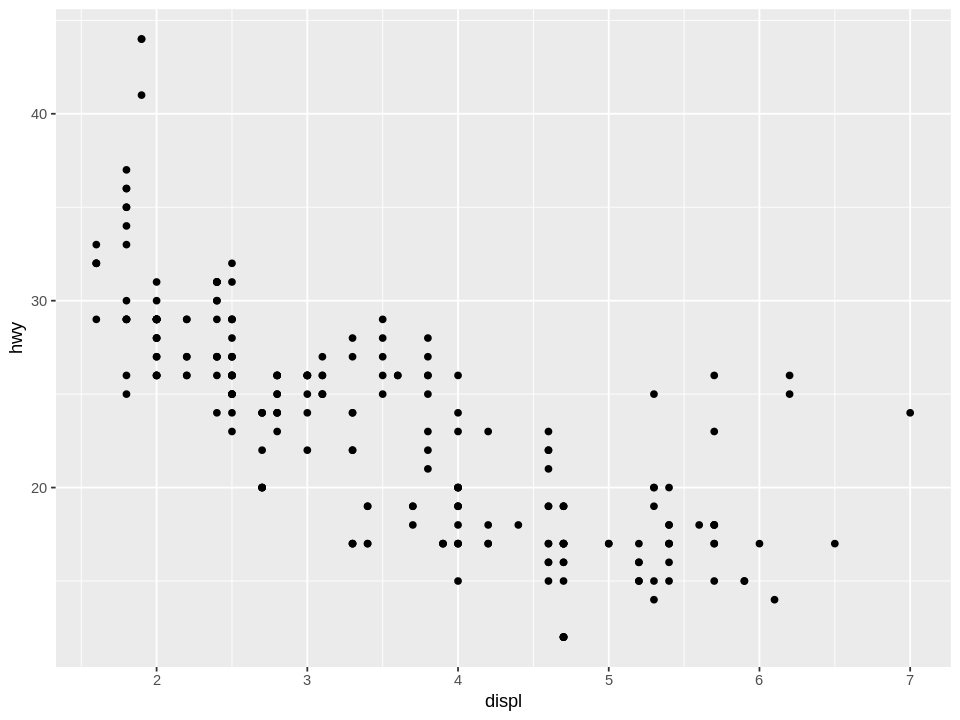

In [17]:
# Gráficamente x = displ, y = hwy
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


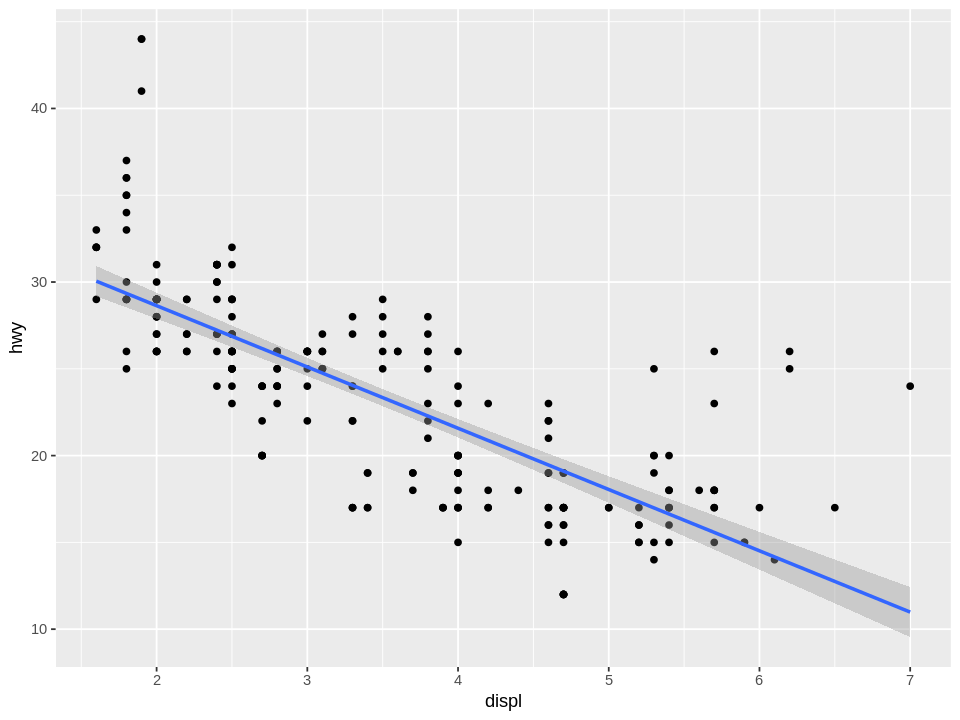

In [18]:
# podemos añadir "recta" de tendencia
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth(method = "lm")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


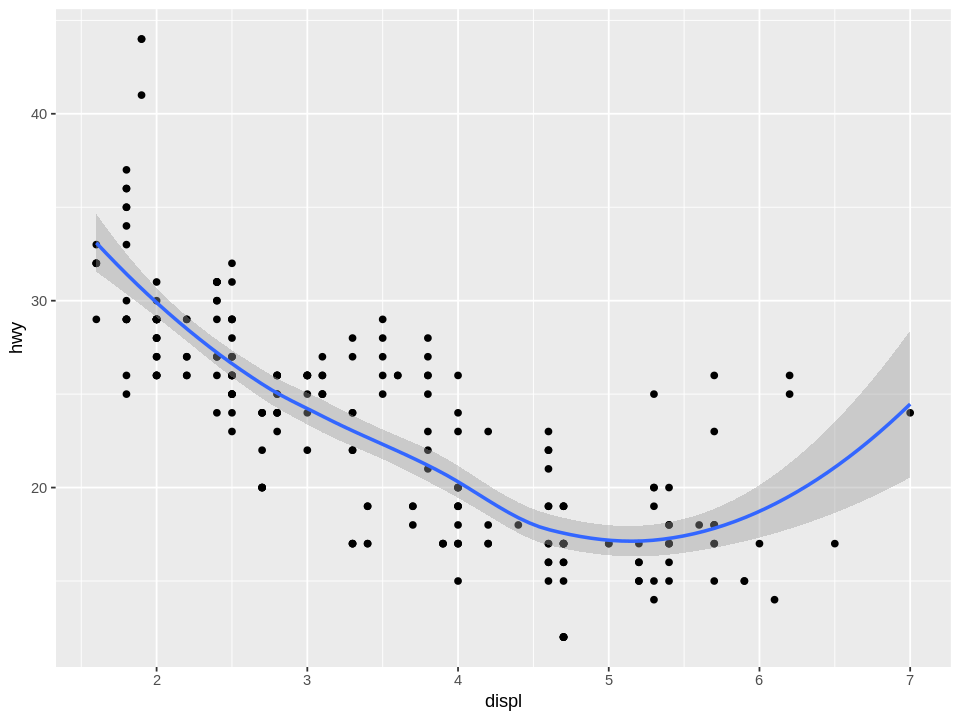

In [19]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

Podemos seleccionar las columnas *mpg,disp,hp,drat,wt,qsec* y generar un gráfico de dispersión para cada par de ellas, con la función plot() del paquete _base_.

### P1. Comando cor
Investigue el comando cor y utilícelo con la selección previa de columnas.
¿Qué observa?

In [ ]:
cor(mpg$displ, mpg$hwy)# Por defecto retorna Pearson (dependencia lineal)
cor( mpg$displ, mpg$hwy, method =  "spearman")

[1] -0.76602

[1] -0.8266576

In [20]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [22]:
#Podemos graficar algunas de las variables de interés


aux <- mtcars %>%
    select(mpg,disp,hp,drat,wt,qsec)

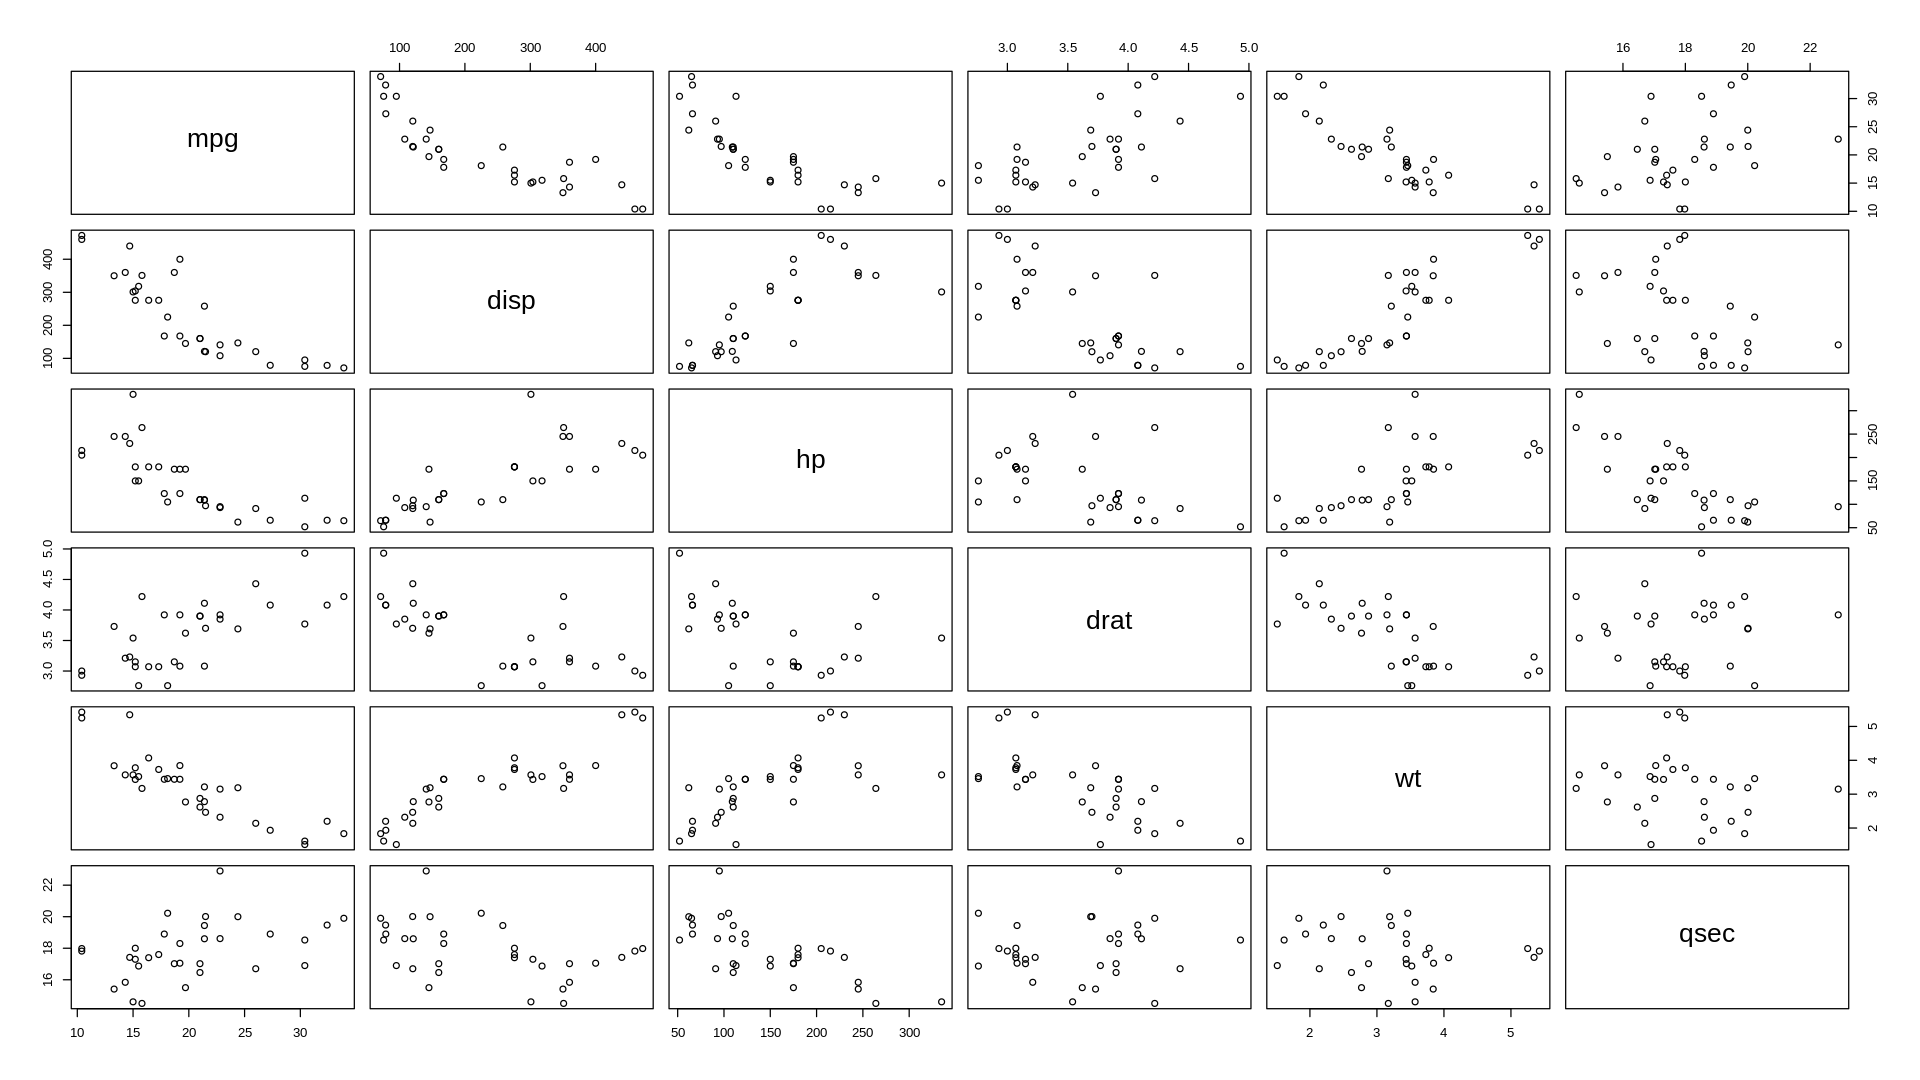

In [23]:
options(repr.plot.width=16, repr.plot.height=9)
plot(aux)

### P2. De acuerdo a  la documentación, cambie el método de cálculo a "spearman"
¿Que observa?

In [24]:
cor(aux) # por defecto calcula correlación de pearson


,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


In [25]:
cor(aux ,method =  "spearman")

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.9088824,-0.8946646,0.65145546,-0.8864220,0.46693575
disp,-0.9088824,1.0000000,0.8510426,-0.68359210,0.8977064,-0.45978176
hp,-0.8946646,0.8510426,1.0000000,-0.52012499,0.7746767,-0.66660602
drat,0.6514555,-0.6835921,-0.5201250,1.00000000,-0.7503904,0.09186863
wt,-0.8864220,0.8977064,0.7746767,-0.75039041,1.0000000,-0.22540120
qsec,0.4669358,-0.4597818,-0.6666060,0.09186863,-0.2254012,1.00000000


## NOTA: parámetro method de la función cor()

In [29]:
set.seed(123) # Semilla para generar númeos aleatorios
x <- rnorm(100) # variable X
e <- rnorm(100, sd = .5) # error aleatorio
# Modelar y como funcion de x y un error aleatorio
# y = f(x) + e
y <- 1+ 3*x^3 + e

A <- data.frame(x = x, y = y)


$y = f(x) + \epsilon$ \\
$y = 3x^{3} + 1 + \epsilon$

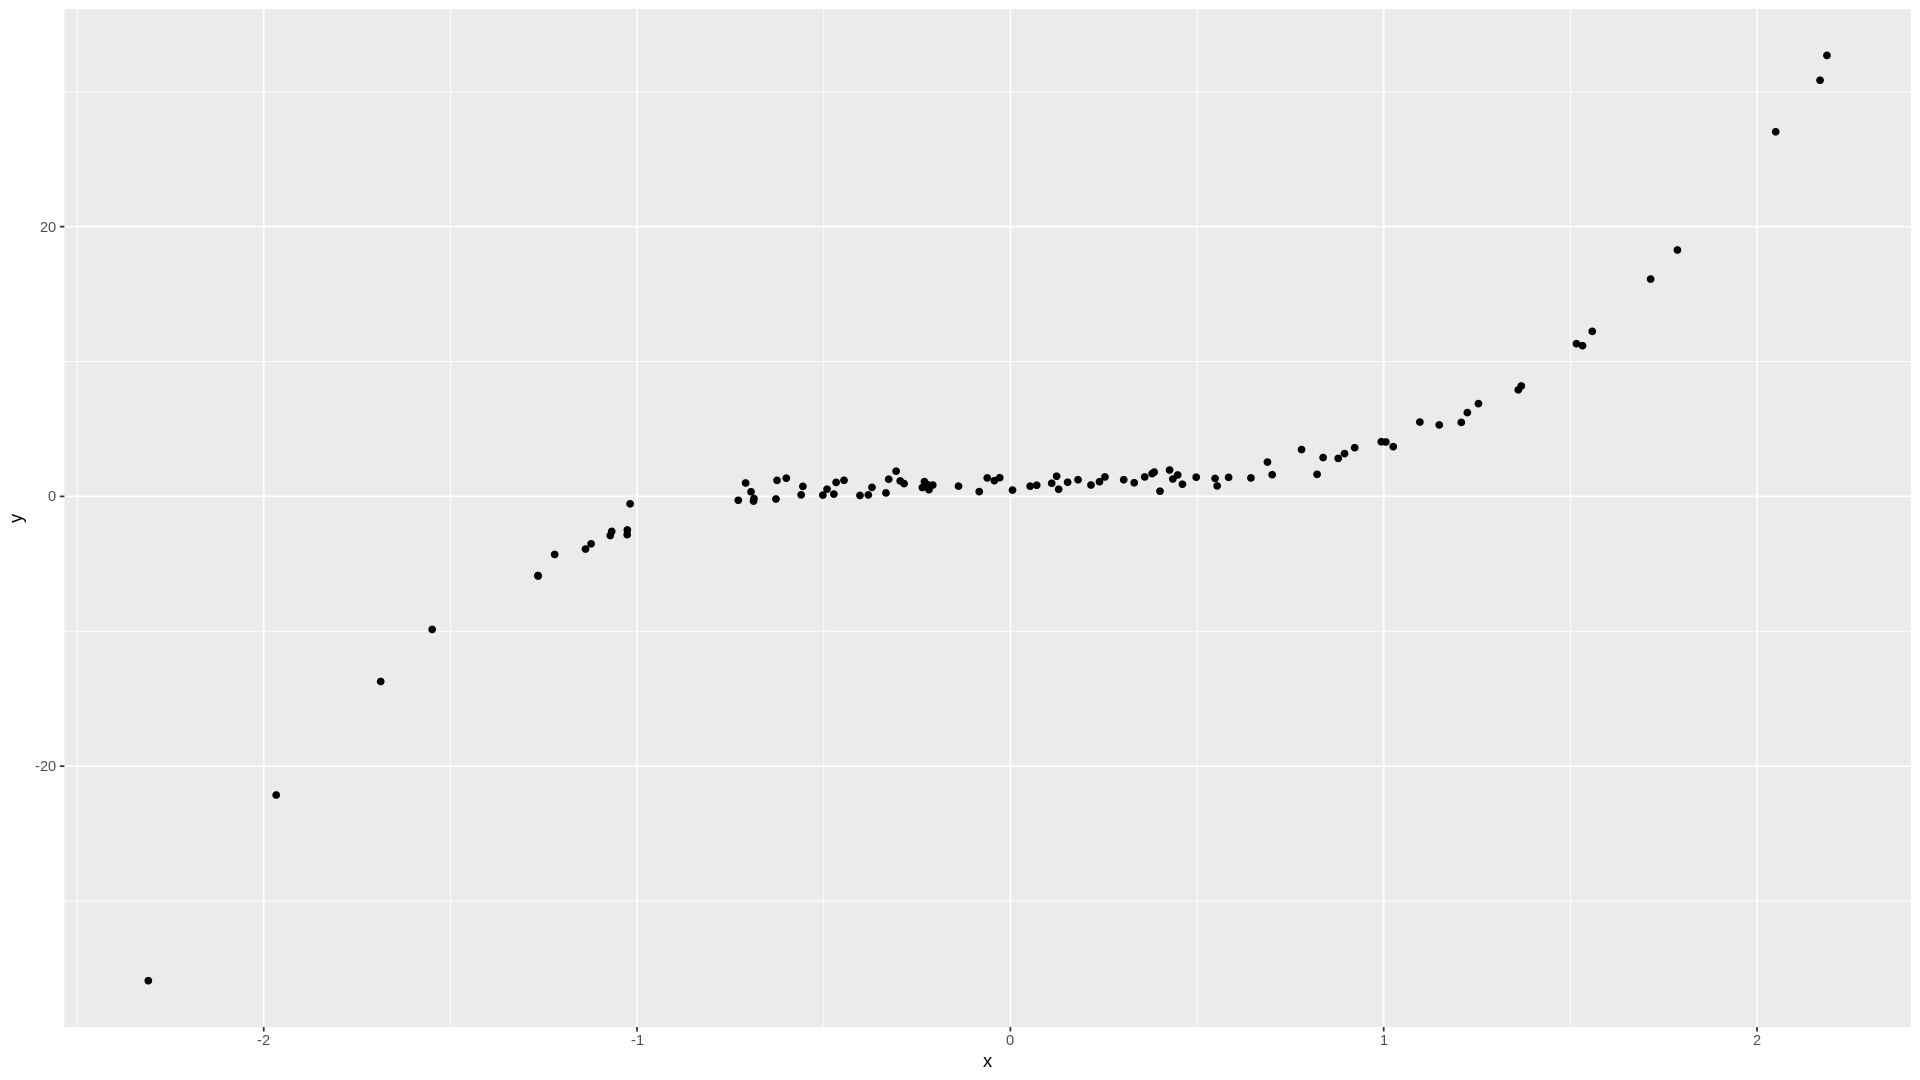

In [27]:
# Gráficamente la relación de x e  y

A %>%
    ggplot() +
    aes(x = x, y = y) +
    geom_point()

In [28]:
# parámetro method de la función cor()
cor(A$x,A$y)
cor(A$x,A$y, method = "spearman")

[1] 0.8257649

[1] 0.9065107

In [30]:
set.seed(123) # Semilla para generar númeos aleatorios
x <- rnorm(100) # variable X
e <- rnorm(100, sd = .5) # error aleatorio
# Modelar y como funcion de x y un error aleatorio
# y = f(x) + e
y <- 1+ 3*x + e

A <- data.frame(x = x, y = y)


$y = f(x) + \epsilon$ \\
$y = 3x + 1 + \epsilon$

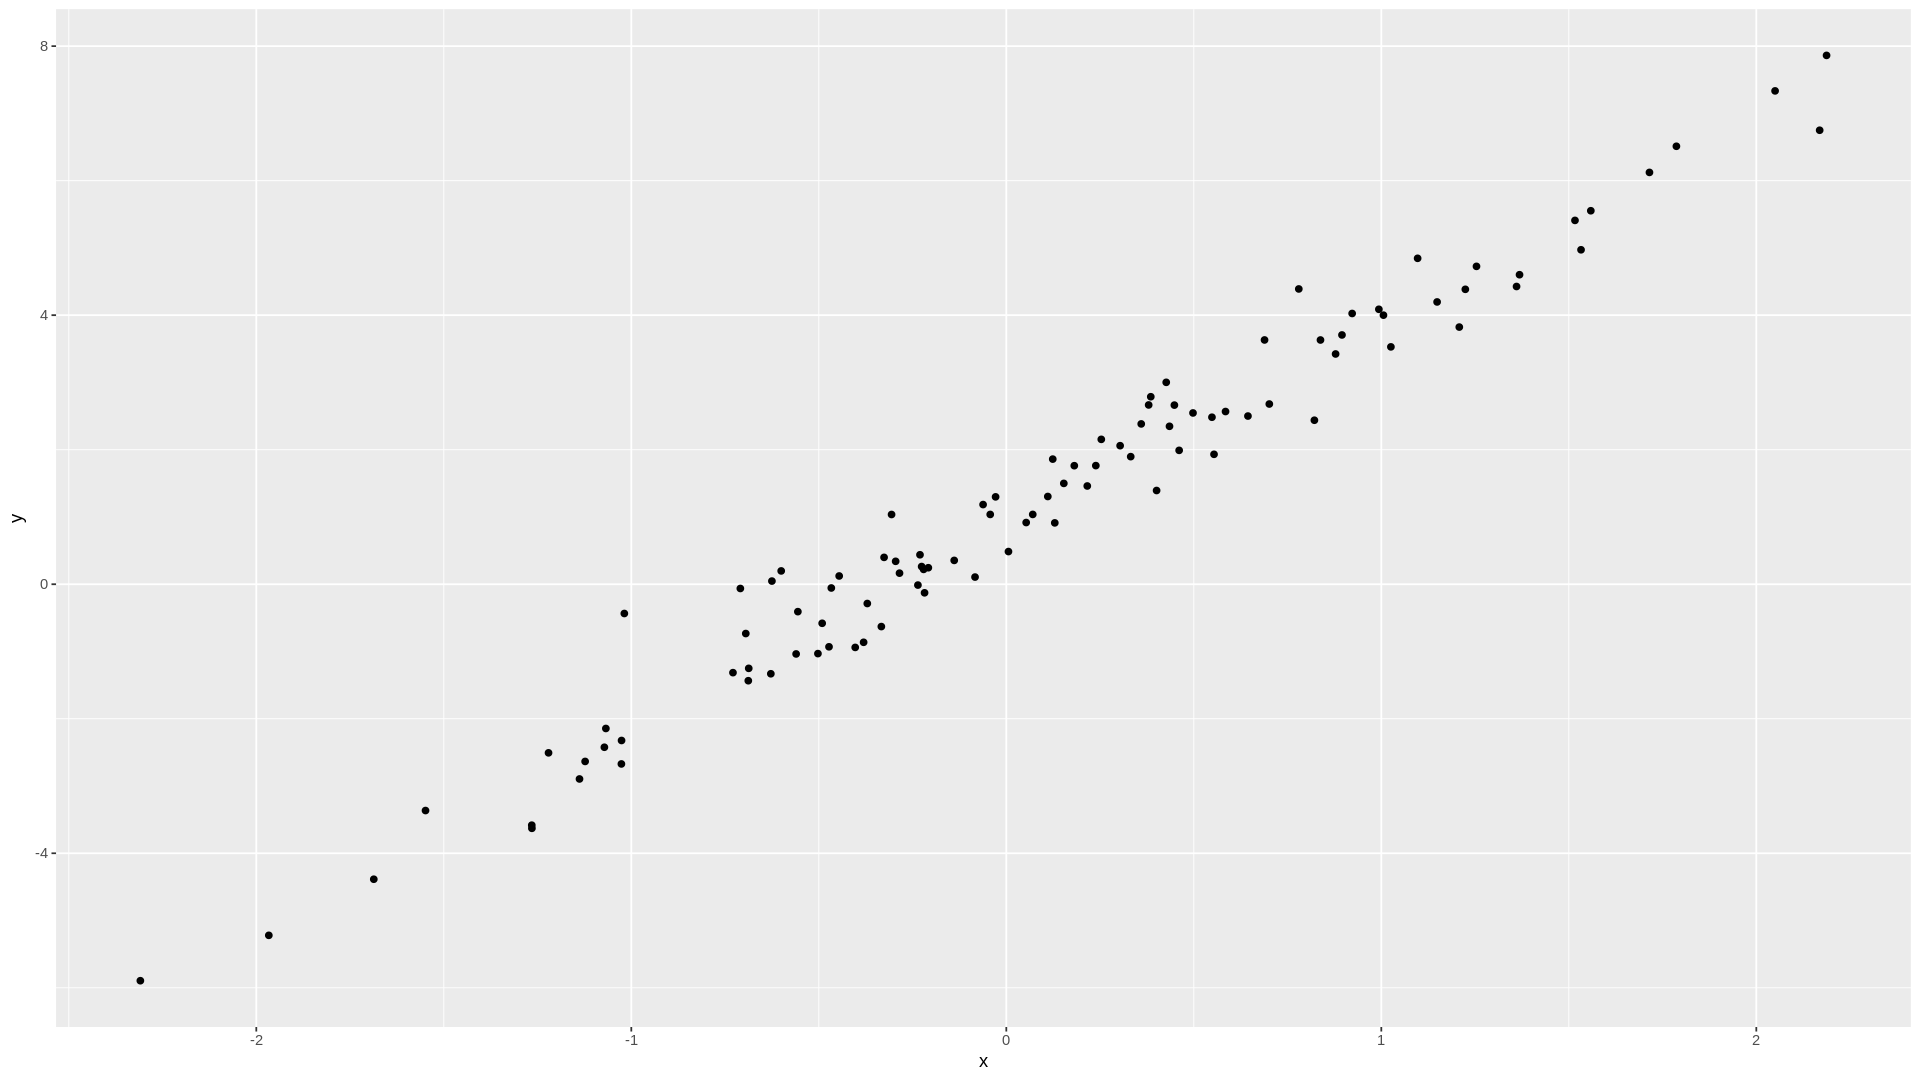

In [31]:
# Gráficamente la relación de x e  y

A %>%
    ggplot() +
    aes(x = x, y = y) +
    geom_point()

In [32]:
cor(A$x,A$y)
cor(A$x,A$y, method = "spearman")

[1] 0.9845424

[1] 0.9805341

## Gráfico de correlación

In [33]:
#install.packages("corrplot")
library(corrplot)

# función corrplot()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



### P3. Opciones de corrplot
Identifique (en la documentación de la función corplot) otros métodos de visualización

In [34]:
matriz_cor <- cor(aux)
matriz_cor

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


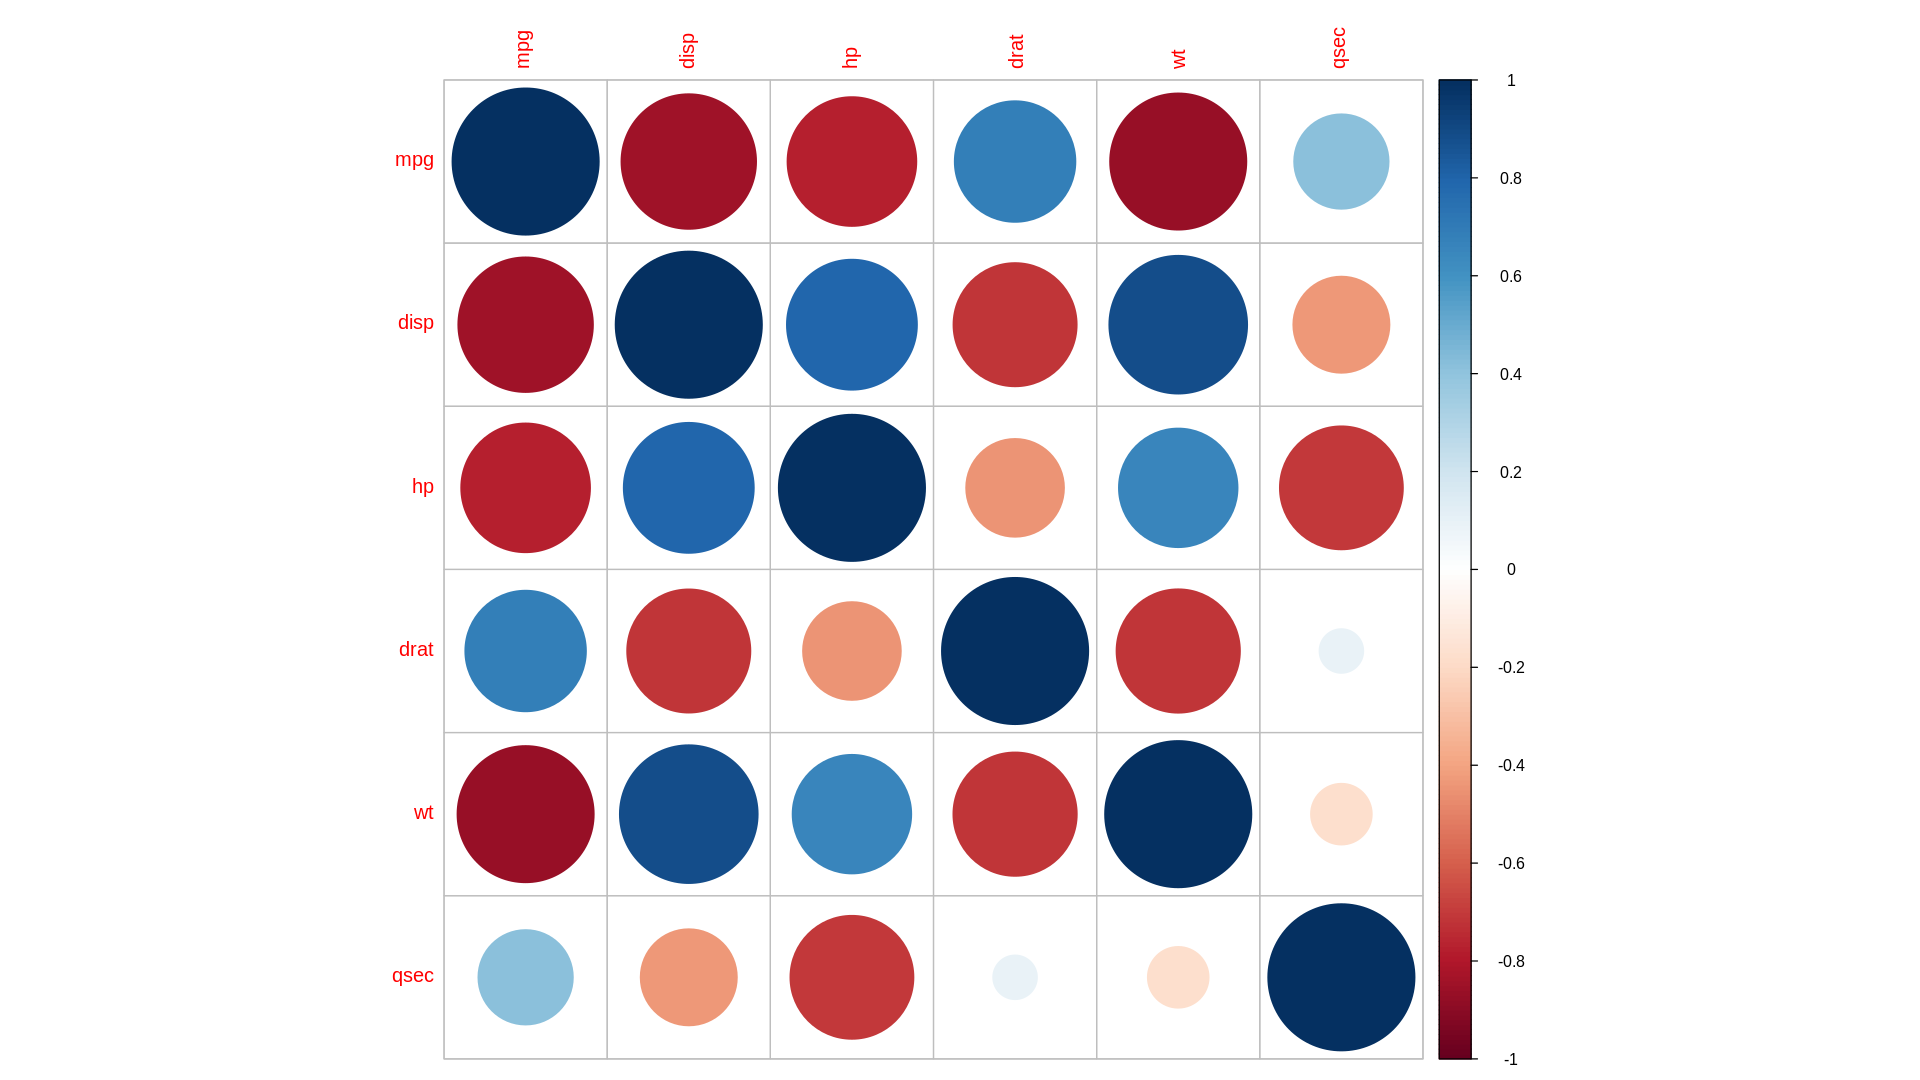

In [35]:
# Función corplot()
# podemos modificar el parámetro "method"
corrplot(matriz_cor)